### Importing Libraries

NumPy is a package in Python used for Scientific Computing. NumPy package is used to perform different operations.  
Pandas is used for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training dataset

In [2]:
dataset_train = pd.read_csv('/Users/rounakbose/Git Local/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Data Preprocessing

Sklearn is a simple and efficient tool for data mining and data analysis built on numpy, scipy and matplotlib. 

Here first we are going to perform feature scaling.  
We are using the MinMaxScaler - transforms features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one.

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a custom data structure

The new data structure that we are going to make will have 60 timesteps and will provide only 1 output.

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping using Pandas

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Now we have finally concluded the part of preprocessing the data.  

### Building the RNN

First, import the Keras library and its necessary packages.  
The Sequential model is a linear stack of layers.  
A dense layer represents a matrix vector multiplication. So you get a m dimensional vector as output. A dense layer thus is used to change the dimensions of your vector. Mathematically speaking, it applies a rotation, scaling, translation transform to your vector.  
An LSTM layer is used for speech recognition, language modeling, sentiment analysis and text prediction.  
A dropout layer is used for regularization where you randomly set some of the dimensions of your input vector to be zero with probability. A dropout layer does not have any trainable parameters i.e. nothing gets updated during backward pass of backpropagation.  

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Initialising the RNN

We are using the Sequential model.  
Then define the 4 LSTM layers and adding some Dropout regularisation.  
Finally, add the output dense layer. 

In [7]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

### Compiling and training the RNN

Then we are fitting our model to the training dataset for 100 epochs.  
Note: The greater the number of epochs:  
a. the better will be the performance of the RNN, but  
b. the more time it will take to compute.

In [8]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0432
Epoch 2/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0070
Epoch 3/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0056
Epoch 4/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0064
Epoch 5/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0049
Epoch 6/200
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0051
Epoch 7/200
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0053
Epoch 8/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0051
Epoch 9/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0042
Epoch 10/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0043
Epoch 11/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0042
Epoch 12/200
1198/1198 [==============================] - 7s 5ms/step - l

### Making the predictions

First, get the real stock prices from Google for the year 2017.  
Then, make the predictions with respect to the original stock prices for 2017.

In [9]:
dataset_test = pd.read_csv('/Users/rounakbose/Git Local/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Plotting the Results

The actual stock prices from Google for the year 2017 are in red.  
The predicted stock prices for the same period of time are in blue, in the same plot.

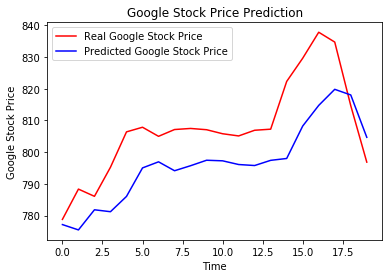

In [10]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

### Conclusion

From the plot above, we can conclude that for 200 epochs, we have quite a big improvement over the results obtained from training the same dataset over 100 epochs.  
This, consequently, proves that, higher the epochs, higher will be the success rate of the predictions (until ofcourse it reaches a saturation value, or starts overfitting, whichever comes first), and inevitably, higher will be the computational time and the necessary computational power for the training and predicting.  

Stock market people can, thus, rely to some extent on the use of Recurrent Neural Networks to predict short-term (>= 1 month and <=1 year, approximately) stock market movements and the general price trends, almost as same as the RBF-kernel models.  